In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
foodcourt = pd.read_csv('foodcourt.csv')
menu = pd.read_csv('foodcourt-menu.csv')

In [3]:
foodcourt.info()
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   category      63384 non-null  object 
 4   price_range   52852 non-null  object 
 5   full_address  63016 non-null  object 
 6   zip_code      62952 non-null  object 
 7   lat           63469 non-null  float64
 8   lng           63469 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   restaurant_id  1048575 non-null  int64 
 1   category       1048575 non-null  object
 2   name           1048574 non-null  object
 3   description    

In [4]:
# Merge datasets on restaurant id
merged_data = pd.merge(menu, foodcourt, left_on='restaurant_id', right_on='id')

In [5]:
# Drop the redundant 'id' column from the merged DataFrame
merged_data.drop(columns=['id'], inplace=True)

In [6]:
# Initial data info
print("Initial data info:")
merged_data.info()

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   restaurant_id  1048575 non-null  int64  
 1   category_x     1048575 non-null  object 
 2   name_x         1048574 non-null  object 
 3   description    784201 non-null   object 
 4   price          1048575 non-null  object 
 5   ReviewId       1048575 non-null  int64  
 6   AuthorId       1048575 non-null  int64  
 7   AuthorName     1048575 non-null  object 
 8   Rating         1048575 non-null  int64  
 9   position       1048575 non-null  int64  
 10  name_y         1048575 non-null  object 
 11  category_y     1048442 non-null  object 
 12  price_range    930706 non-null   object 
 13  full_address   1043622 non-null  object 
 14  zip_code       1043622 non-null  object 
 15  lat            1048575 non-null  float64
 16  lng            1048575 non-null  fl

In [7]:
# Select relevant columns
df = merged_data[['restaurant_id','category_x', 'name_x', 'description', 'price', 'Rating', 'name_y', 'category_y']]

In [8]:
print("Initial data info:")
df.info()
df

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   restaurant_id  1048575 non-null  int64 
 1   category_x     1048575 non-null  object
 2   name_x         1048574 non-null  object
 3   description    784201 non-null   object
 4   price          1048575 non-null  object
 5   Rating         1048575 non-null  int64 
 6   name_y         1048575 non-null  object
 7   category_y     1048442 non-null  object
dtypes: int64(2), object(6)
memory usage: 64.0+ MB


,restaurant_id,category_x,name_x,description,price,Rating,name_y,category_y
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,5,PJ Fresh (224 Daniel Payne Drive),"Burgers, American, Sandwiches"
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,4,PJ Fresh (224 Daniel Payne Drive),"Burgers, American, Sandwiches"
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,2,PJ Fresh (224 Daniel Payne Drive),"Burgers, American, Sandwiches"
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,5,PJ Fresh (224 Daniel Payne Drive),"Burgers, American, Sandwiches"
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,5,PJ Fresh (224 Daniel Payne Drive),"Burgers, American, Sandwiches"
...,...,...,...,...,...,...,...,...
1048570,13162,Special Menu,CRAB FRIED RICE,NaN,15.95 USD,5,Benjarong Thai (Maple Valley),"Northeastern Thai, Asian Fusion, Family Friendly"
1048571,13162,Special Menu,PAD CHA GANG PA,"CHICKEN, PORK, SHRIMP COOK IN SPECIAL SPICY CU...",13.95 USD,5,Benjarong Thai (Maple Valley),"Northeastern Thai, Asian Fusion, Family Friendly"
1048572,13162,Beverages,Thai Iced Tea,NaN,3.75 USD,5,Benjarong Thai (Maple Valley),"Northeastern Thai, Asian Fusion, Family Friendly"
1048573,13162,Beverages,Thai Iced Coffee,NaN,3.75 USD,5,Benjarong Thai (Maple Valley),"Northeastern Thai, Asian Fusion, Family Friendly"


In [9]:
# Drop rows with any missing values
df.dropna(inplace=True)
print("Data info after dropping NA:")
df.info()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11572\3438961355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Data info after dropping NA:
<class 'pandas.core.frame.DataFrame'>
Index: 784083 entries, 0 to 1048571
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   restaurant_id  784083 non-null  int64 
 1   category_x     784083 non-null  object
 2   name_x         784083 non-null  object
 3   description    784083 non-null  object
 4   price          784083 non-null  object
 5   Rating         784083 non-null  int64 
 6   name_y         784083 non-null  object
 7   category_y     784083 non-null  object
dtypes: int64(2), object(6)
memory usage: 53.8+ MB


In [10]:
# Check for any remaining null values
df.isnull().sum()

restaurant_id    0
category_x       0
name_x           0
description      0
price            0
Rating           0
name_y           0
category_y       0
dtype: int64

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
print("Data info after dropping duplicates:")
df.info()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11572\2368032124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Data info after dropping duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 782547 entries, 0 to 1048571
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   restaurant_id  782547 non-null  int64 
 1   category_x     782547 non-null  object
 2   name_x         782547 non-null  object
 3   description    782547 non-null  object
 4   price          782547 non-null  object
 5   Rating         782547 non-null  int64 
 6   name_y         782547 non-null  object
 7   category_y     782547 non-null  object
dtypes: int64(2), object(6)
memory usage: 53.7+ MB


In [12]:
# Drop duplicate rows based on 'name_x'
df.drop_duplicates(subset='name_x', inplace=True)
print("Data info after dropping duplicates dish name:")
df.info()

Data info after dropping duplicates dish name:
<class 'pandas.core.frame.DataFrame'>
Index: 188729 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   restaurant_id  188729 non-null  int64 
 1   category_x     188729 non-null  object
 2   name_x         188729 non-null  object
 3   description    188729 non-null  object
 4   price          188729 non-null  object
 5   Rating         188729 non-null  int64 
 6   name_y         188729 non-null  object
 7   category_y     188729 non-null  object
dtypes: int64(2), object(6)
memory usage: 13.0+ MB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11572\3080692301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='name_x', inplace=True)


In [13]:
# Convert 'price' column to numeric by removing 'USD' and converting to float
df['price'] = df['price'].str.replace(' USD', '').astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11572\2419902313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(' USD', '').astype(float)


In [14]:
# Remove rows with price equal to 0
df = df[df['price'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186624 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   restaurant_id  186624 non-null  int64  
 1   category_x     186624 non-null  object 
 2   name_x         186624 non-null  object 
 3   description    186624 non-null  object 
 4   price          186624 non-null  float64
 5   Rating         186624 non-null  int64  
 6   name_y         186624 non-null  object 
 7   category_y     186624 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.8+ MB


In [15]:
# Function to check for unwanted characters
def contains_unwanted_chars(row):
    pattern = re.compile(r'[â€™Â®Ã©±â„¢#]')
    for value in row:
        if isinstance(value, str) and pattern.search(value):
            return True
    return False

In [16]:
# Filter out rows with unwanted characters
df = df[~df.apply(contains_unwanted_chars, axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177016 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   restaurant_id  177016 non-null  int64  
 1   category_x     177016 non-null  object 
 2   name_x         177016 non-null  object 
 3   description    177016 non-null  object 
 4   price          177016 non-null  float64
 5   Rating         177016 non-null  int64  
 6   name_y         177016 non-null  object 
 7   category_y     177016 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.2+ MB


In [17]:
# Filter out rows where 'name_x' contains numbers
df = df[~df['name_x'].str.contains(r'\d', regex=True)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131835 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   restaurant_id  131835 non-null  int64  
 1   category_x     131835 non-null  object 
 2   name_x         131835 non-null  object 
 3   description    131835 non-null  object 
 4   price          131835 non-null  float64
 5   Rating         131835 non-null  int64  
 6   name_y         131835 non-null  object 
 7   category_y     131835 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.1+ MB


In [18]:
# Filter out rows with rating less than 1 or more than 5
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126944 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   restaurant_id  126944 non-null  int64  
 1   category_x     126944 non-null  object 
 2   name_x         126944 non-null  object 
 3   description    126944 non-null  object 
 4   price          126944 non-null  float64
 5   Rating         126944 non-null  int64  
 6   name_y         126944 non-null  object 
 7   category_y     126944 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 8.7+ MB


In [19]:
# Filter out rows containing unwanted words
unwanted_words = ['pork', 'wine', 'alcohol']
pattern = '|'.join(unwanted_words)
mask = df.apply(lambda row: row.astype(str).str.contains(pattern, case=False).any(), axis=1)
df = df[~mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116418 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   restaurant_id  116418 non-null  int64  
 1   category_x     116418 non-null  object 
 2   name_x         116418 non-null  object 
 3   description    116418 non-null  object 
 4   price          116418 non-null  float64
 5   Rating         116418 non-null  int64  
 6   name_y         116418 non-null  object 
 7   category_y     116418 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 8.0+ MB


In [20]:
# Filter out rows containing '&amp' in any column
mask = df.apply(lambda row: row.astype(str).str.contains('&amp').any(), axis=1)
df = df[~mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90894 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  90894 non-null  int64  
 1   category_x     90894 non-null  object 
 2   name_x         90894 non-null  object 
 3   description    90894 non-null  object 
 4   price          90894 non-null  float64
 5   Rating         90894 non-null  int64  
 6   name_y         90894 non-null  object 
 7   category_y     90894 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.2+ MB


In [21]:
# Filter out rows where 'name_x' or 'category_x' starts with a number or special character
regex_pattern = r'^[^a-zA-Z]'
mask = df['name_x'].str.match(regex_pattern, na=False) | df['category_x'].str.match(regex_pattern, na=False)
df = df[~mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89664 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  89664 non-null  int64  
 1   category_x     89664 non-null  object 
 2   name_x         89664 non-null  object 
 3   description    89664 non-null  object 
 4   price          89664 non-null  float64
 5   Rating         89664 non-null  int64  
 6   name_y         89664 non-null  object 
 7   category_y     89664 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.2+ MB


In [22]:
# Remove rows where 'category_x' or 'name_x' or 'name_y' are in all uppercase
df = df[~df['category_x'].str.isupper()]
df = df[~df['name_x'].str.isupper()]
df = df[~df['name_y'].str.isupper()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86390 entries, 0 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  86390 non-null  int64  
 1   category_x     86390 non-null  object 
 2   name_x         86390 non-null  object 
 3   description    86390 non-null  object 
 4   price          86390 non-null  float64
 5   Rating         86390 non-null  int64  
 6   name_y         86390 non-null  object 
 7   category_y     86390 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.9+ MB


In [23]:
# Filter out rows where 'name_y' contains numbers
df = df[~df['name_y'].str.contains(r'\d', regex=True)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75232 entries, 95 to 1048564
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  75232 non-null  int64  
 1   category_x     75232 non-null  object 
 2   name_x         75232 non-null  object 
 3   description    75232 non-null  object 
 4   price          75232 non-null  float64
 5   Rating         75232 non-null  int64  
 6   name_y         75232 non-null  object 
 7   category_y     75232 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.2+ MB


In [24]:
# Remove rows with parentheses in any column
df = df[~df.apply(lambda row: row.astype(str).str.contains(r'\(|\)').any(), axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55432 entries, 95 to 1048345
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  55432 non-null  int64  
 1   category_x     55432 non-null  object 
 2   name_x         55432 non-null  object 
 3   description    55432 non-null  object 
 4   price          55432 non-null  float64
 5   Rating         55432 non-null  int64  
 6   name_y         55432 non-null  object 
 7   category_y     55432 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.8+ MB


In [25]:
# Function to categorize price into range
def categorize_price(price):
    if price <= 10:
        return 'low'
    elif price <= 30:
        return 'medium'
    else:
        return 'high'

In [26]:
# Apply function to create price_range column
df['price_range'] = df['price'].apply(categorize_price)

In [27]:
# Ensure 'name_y' contains only letters and spaces
df = df[df['name_y'].str.match(r'^[a-zA-Z ]+$')]

In [28]:
# Initialize an empty list to store sampled DataFrames
sampled_dfs = []

In [29]:
# Iterate over each letter from A to Z
for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    # Filter rows that start with the current letter
    letter_df = df[df['category_x'].str.startswith(letter)]
    
    # Sample 200 random restaurants if there are at least 200, else take all
    if len(letter_df) >= 250:
        sampled_df = letter_df.sample(n=250, random_state=42)
    else:
        sampled_df = letter_df
    
    # Append the sampled DataFrame to the list
    sampled_dfs.append(sampled_df)

In [30]:
# Concatenate all sampled DataFrames into a final DataFrame
final_df = pd.concat(sampled_dfs, ignore_index=True)

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  5474 non-null   int64  
 1   category_x     5474 non-null   object 
 2   name_x         5474 non-null   object 
 3   description    5474 non-null   object 
 4   price          5474 non-null   float64
 5   Rating         5474 non-null   int64  
 6   name_y         5474 non-null   object 
 7   category_y     5474 non-null   object 
 8   price_range    5474 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 385.0+ KB


In [32]:
final_df

,restaurant_id,category_x,name_x,description,price,Rating,name_y,category_y,price_range
0,7942,Appetizer,Thai Fried Chicken Wings,Marinated and deep fried wings served with swe...,10.95,5,Thai Greenwood Restaurant,"Thai, Asian Fusion, Noodles",medium
1,11244,Appetizers,Mai Thai Spring,"Crispy rolls stuffed with marinated shrimp, se...",11.95,5,Mai Thai Portland,"Thai, Asian, Noodles",medium
2,2978,Appetizers,Kaki Fry,Fried oysters. Served with mayo and vegetable ...,6.75,5,Ramen Station,"Japanese, Ramen",low
3,8353,Appetizers,Botana Mixta,"Combination of guacamole, quesadillas, nacho, ...",18.00,5,Casa Guerrero,"Seafood, Mexican, Vegetarian Friendly",medium
4,1600,Appetizers,Homemade Fries,Served with owl dipping sauce.,3.75,5,The Green Owl,"American, Traditional American, Pub, Bar Food,...",low
...,...,...,...,...,...,...,...,...,...
5469,9608,Ziti Pasta Special,Garlic Chicken Fettuccine,Served with Ziti's famous garlic bread. Garlic...,13.99,5,Ziti Pasta Italiano,"Italian, Pasta, Sandwich",medium
5470,9608,Ziti Pasta Special,Calabria Chicken Penne,Blend of garlic Parmesan cream sauce and marin...,13.99,5,Ziti Pasta Italiano,"Italian, Pasta, Sandwich",medium
5471,9608,Ziti Pasta Special,Basil Pesto Penne with Garlic Chicken,Narrow tube shaped pasta.,13.99,5,Ziti Pasta Italiano,"Italian, Pasta, Sandwich",medium
5472,9608,Ziti Pasta Special,Penne Gusto,"Roasted eggplant, mushrooms, Kalamata olives, ...",13.99,5,Ziti Pasta Italiano,"Italian, Pasta, Sandwich",medium


In [33]:
# Save the updated DataFrame to a new CSV file
final_df.to_csv('updated_dataset.csv', index=False)

c:\Users\LENOVO\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35910 (\N{CJK UNIFIED IDEOGRAPH-8C46}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LENOVO\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33104 (\N{CJK UNIFIED IDEOGRAPH-8150}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LENOVO\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21450 (\N{CJK UNIFIED IDEOGRAPH-53CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LENOVO\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34092 (\N{CJK UNIFIED IDEOGRAPH-852C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LENOVO\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33756 (\N{CJK UNIFIED IDEOGRAPH-83DC}) missing from current font.
  fig.canvas.print_figure(bytes_

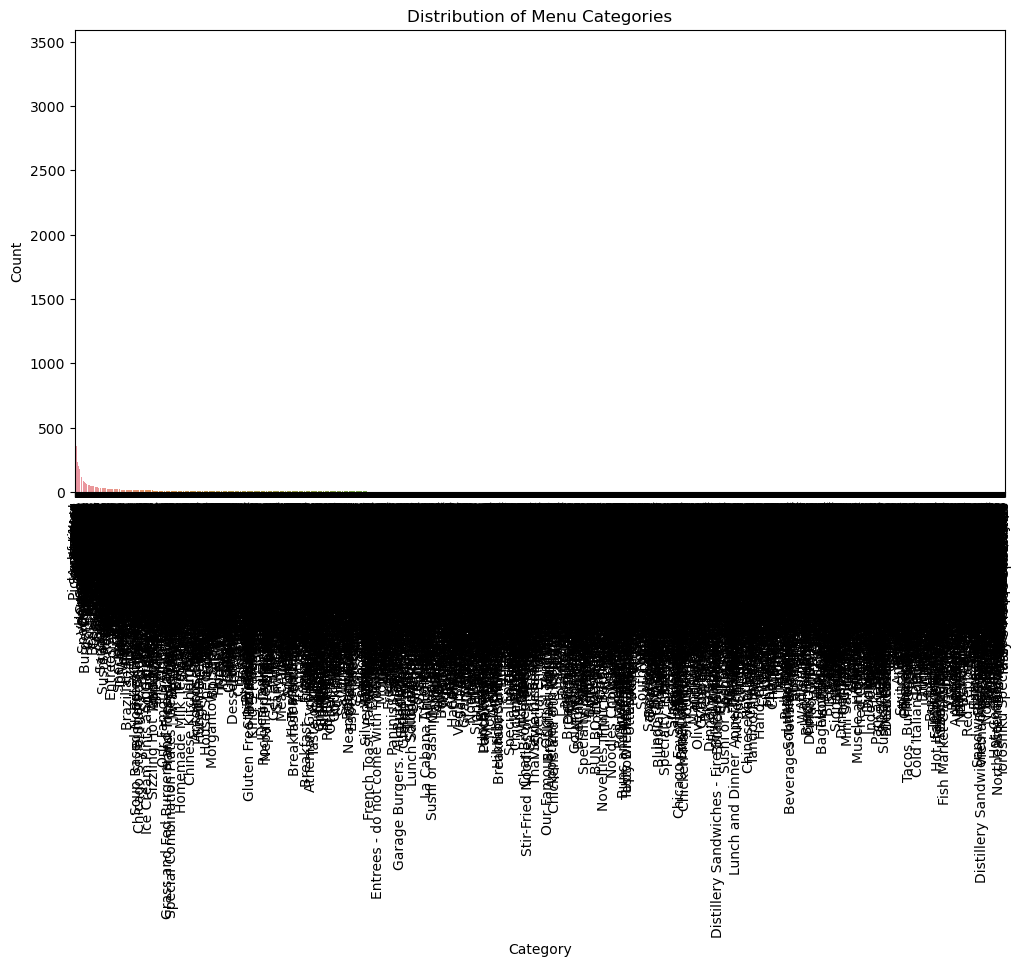

In [34]:
# Plot the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category_x', order=df['category_x'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Menu Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

c:\Users\LENOVO\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


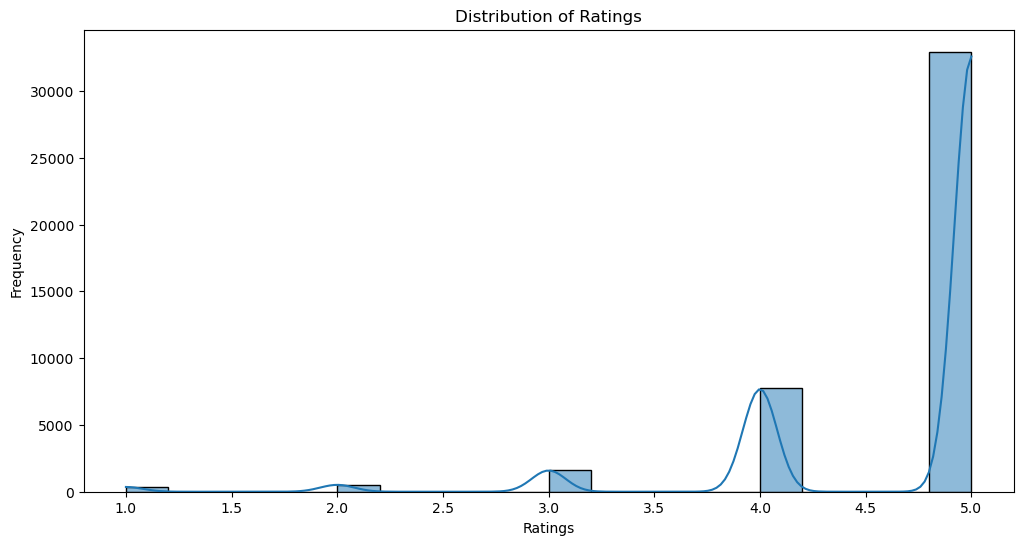

In [35]:
# Plot the distribution of ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()